# Project write-up for Milestone 1 - Nadim Hashmeh, CMPS 6160

__Background:__ Mars has two polar caps that are largely composed of water ice, like Earth. Planetary scientists measure the amount of electromagnetic radiation reflected off the polar cap surface as well as dielectric interfaces in the subsurface using active radar sounding to learn more about its composition and internal structure. The strength of radar reflections is mostly determined by the contrast in dielectric properties between two overlying materials, such as the atmosphere and ice, or ice and rock. Radar reflections at the surface and below are typically represented as bright "reflectors" in cross-sectional images known as radargrams. The data that comprises these radargrams are three dimensional: horizontal position, vertical position, and brightness (relative power of reflection). Using these, scientists can analyze the vertical distribution of dielectric contrasts that are sensitive to the frequency of the radar being used.

__Motivation:__ For my PhD, I am attempting to explain the unexpected behavior of high frequency radar at the south polar cap in order to gain more understanding about its interior structure, distribution of material, and surface texture. High frequency radar behavior (20 MHz) at the south polar cap differs from its northern counterpart, as well as many typical glacier observations on Earth, in that it is often incoherent and rapidly attenuates before reaching the basal interface, if it even reaches the base at all. At lower frequencies (~5 MHz), this behavior is not observed in either polar cap. Therefore, some property of the south polar cap is sensitive to scattering radar at relatively higher frequencies. One way to investigate this is to compare the basal reflector power to the thickness of material above it. One would expect a negative correlation between these two variables, and in my own work, I have observed it in some areas. However, there are many unexpected instances where it does not follow the same trend. My broader research goals aim to explain this behavior, and one avenue I have considered is looking at the role of surface slope in influencing the propagation of radar through the south polar ice.

__Data:__ I have surface and basal reflector information for both south and north polar caps. SHAllow RADar (SHARAD) radargrams are available in NASA's Planetary Data System archive, which I used to extract the reflector position and power information from using a variety of tools during my own research. This compiled dataset contains the orbit number, reflector identifier, vertical pixel position, surface elevation, raw radar power, latitude, longitude, and spatial categorical information of pairs of surface and basal reflectors. 

__Plan and question(s) to be answered:__ I will use Python to calculate the slope of each surface reflector I have mapped and compare that information to ice thickness and reflector power values to see if surface slope shows any correlation across these variables. Basically, do steeper surfaces affect the detection of the base in any notable way? I will also explore relationships between these values and the spatial categorical data they contain to note the regional distribution of my observations.

### Project website (this page):
https://nhashmeh.github.io

### Project repository: 
https://github.com/nhashmeh/nhashmeh.github.io

### Project data: 
https://github.com/nhashmeh/nhashmeh.github.io/blob/main/spld_data_6160project.csv

#### Raw SHARAD data: 
https://pds-geosciences.wustl.edu/missions/mro/sharad.htm

#### SHARAD instrument documentation: 
Seu, R., Phillips, R. J., Biccari, D., Orosei, R., Masdea, A., Picardi, G., Safaeinili, A., Campbell, B. A., Plaut, J. J., Marinangeli, L., Smrekar, S. E., & Nunes, D. C. (2007). SHARAD sounding radar on the Mars Reconnaissance Orbiter. Journal of Geophysical Research, 112(E5), E05S05. https://doi.org/10.1029/2006JE002745


In [5]:
# import relevant libraries
import pandas as pd

In [6]:
# load in data

all_data = pd.read_csv('spld_data_6160project.csv',header=0)
all_data.head()

,orbit_num,segment_id,br_loc,surf_loc,br_power_raw,surf_power_raw,lat,lon,surf_elevation,region,lrz,fog
0,37201,0,1619,1458,0.000362,0.216509,-75.3896,180.1296,1901.906494,UL,yes,yes
1,37201,0,1616,1457,0.000320,0.229403,-75.3970,180.1237,1903.368896,UL,yes,yes
2,37201,0,1617,1457,0.000273,0.217162,-75.4043,180.1178,1905.088501,UL,yes,yes
3,37201,0,1616,1457,0.000353,0.156191,-75.4128,180.1109,1907.261230,UL,yes,yes
4,37201,0,1613,1457,0.000317,0.193375,-75.4202,180.1049,1908.500610,UL,yes,yes


### Data description and origin:

Each observation contains information about a pair of basal and surface reflector pixels within the same column of a given radargram. Refer to the radargram example in the next section for a better idea of what the columns represent.

__orbit_num:__ The orbit number of the Mars Reconnaissance Orbiter at the time this data was captured. It is also the track number of the radargram produced from this orbital observation.

__segment_id__: The segment id is unique for a given reflector segment pair. Usually, multiple pixel pairs are measured from a given radargram. Adjacent pixels represent a single continuous reflector segment, identified by their segment identification number (segment_id). Multiple pixel segments are common across a single radargram, which is why they require an identification number to distinguish themselves from each other.

__br_loc:__ basal reflector location. This is the y-coordinate location of the basal reflector pixel mapped in a given radargram. This value increases going down a column of radargram pixels, as opposed to typical cartesian coordinates where the opposite is true.

__surf_loc:__ surface reflector location. This is the location of the surface reflector pixel directly above the basal reflector pixel (br_loc). Same description as br_loc.

__br_raw_power:__ dimensionless radar power value of the basal reflector. The strength of the radar reflection off the basal interface of the south polar cap is assigned a magnitude once it reaches the spacecraft. These values tend to have a large range, with low numbers representing weak returns and vice versa. Because of this, it is useful to convert this value to decibels to facilitate easier comparisons between different radar observations.

__surf_raw_power:__ dimensionless radar power value of the surface reflector. This is the power of the surface reflector pixel directly above the basal reflector pixel (br_raw_power). Same description as br_raw_power.

__lat__: latitude of the basal and surface reflector pixel pair. Each column of pixels in a radargram has an associated latitude and longitude that comes from the geometry file associated with each radargram produced by the SHARAD instrument team. Units are in degrees.

__lon__: longitude of the basal and surface reflector pixel pair. Same description as lat. Units are in degrees.

__surf_elevation__: Real surface elevation of the surface reflector pixel measured in a radargram. Units are in meters. This value does not come from the radar data. I extracted elevation data coincident with my radar reflector observations using the Mars Orbiter Laser Altimeter (MOLA) dataset in a GIS software. These values were appended to this dataset afterwards. 

__region__: Acronym for named region for where the observation is located. These names come from the literature and do not have distinct boundaries but are instead used to describe broad regions in geological analyses. For the purposes of this project, I have drawn the boundaries myself according to what I know to be true in the literature. AL = Australe Lingula; AS = Australe Scopuli; PL = Promethei Lingula; SP = Sisyphi Planum; UL = Ultima Lingula.

__lrz__: Low Reflectivity Zone. The yes/no refers to the presence of a low reflectivity zone (LRZ) between the surface and basal reflectors. LRZ are a distinct radar facies observed in SHARAD data at the south polar cap. As the name implies, LRZs are relatively thick regions free of (or contain very few) reflectors. They are of interest due to their seemingly continuous composition. Though the south polar cap is almost entirely water ice by volume (with a ~10% bulk fraction of dust), massive LRZ deposits found near the pole have recently been confirmed to be carbon dioxide ice. This has implications for the climatological history of Mars, and suggests further investigation into the compositions of other LRZ in the SPLD is necessary.

__fog__: The incoherent behavior of the radar signal at the south polar cap often manifests as a widespread cloud of gray starting beneath the surface reflector in radargrams and extending well into the volume, obscuring any potential radar stratigraphy. This effect is thought to be related to surface and/or volumetric scattering, and resembles a fog-like appearance, hence the name. Like LRZ, this phenomenon is of interest due to its implications for polar cap composition and history, particularly when compared to the fog-less northern polar cap.

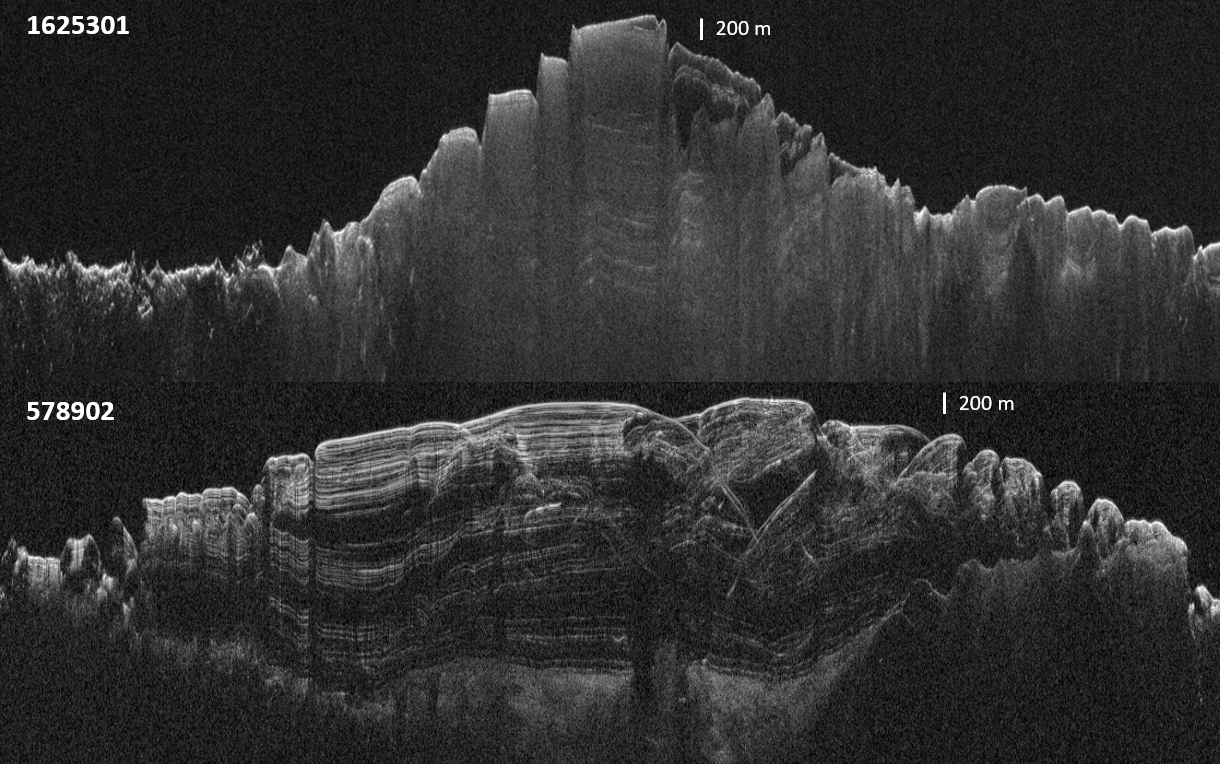

Typical SHARAD radargrams of the south (top) and north (bottom) polar caps. In the south, note the fog-like scatter effect, scarcity of clear internal reflectors, and the large carbon dioxide ice deposits near the surface at its highest points. Compare that to the relatively coherent and stratigraphically dense north polar cap radargram.